In [1]:
import os
dir_notebook = os.getenv( "HOME" )
file_include = dir_notebook + "/_include.ipynb"
%run $file_include

In [2]:
%matplotlib inline

import venn

In [3]:
def fasta_to_dic_for_gff(name1_file):
    name1_dic = {}
    for y in SeqIO.parse(name1_file, "fasta"):
        des_ = y.description
        gene_id = None
        if "[gene=" in des_:
            gene_id = des_.split("[gene=")[1]
            gene_id = gene_id.split("] [")[0]
        locus_tag = des_.split("[locus_tag=")[1]
        locus_tag = locus_tag.split("] [")[0]
        location = des_.split("[location=")[1]
        location = location.split("] [")[0]
        if "complement" in location:
            strand = "-"
            start_end = location.split("nt(")[1]
            start = start_end.split("..")[0]
            end = start_end.split("..")[1][:-1]
        else:
            strand = "+"
            start = location.split("..")[0]
            end = location.split("..")[1]
        product = des_.split(" [protein=")[1]
        product = product.split("] [")[0]
        if strand == "-":
            name1_v = "\t%s\t%s\t%s\t%s\t-\t%s" % (gene_id, locus_tag, end, start, product)
        else:
            name1_v = "\t%s\t%s\t%s\t%s\t+\t%s" % (gene_id, locus_tag, start, end, product)
        name1_dic[y.id] = name1_v
    return name1_dic

In [3]:
ufl_dir = dir_notebook + "/ufl/"
anno_folder_dir = ufl_dir + "annotation_aa/2nd/"
name_ = os.listdir(anno_folder_dir)
name_.sort()
print name_
inparanoid_result_dir = ufl_dir + "inparanoid_results/2nd/"
folder_lst = os.listdir(inparanoid_result_dir)
folder_lst.sort()
print folder_lst

['GCF_002099615.1.fas', 'GCF_002212785.1.fas', 'GCF_002290875.1.fas', 'GCF_002290995.1.fas']
['GCF_002099615.1.fas-GCF_002212785.1.fas', 'GCF_002099615.1.fas-GCF_002290875.1.fas', 'GCF_002099615.1.fas-GCF_002290995.1.fas', 'GCF_002212785.1.fas-GCF_002290875.1.fas', 'GCF_002212785.1.fas-GCF_002290995.1.fas', 'GCF_002290875.1.fas-GCF_002290995.1.fas']


In [5]:
A = name_[0].replace(".fas", "")
B = name_[1].replace(".fas", "")
C = name_[2].replace(".fas", "")
D = name_[3].replace(".fas", "")
print A, "/", B, "/", C, "/", D
name_dic = { A: "NZ_NAFU", B:"NZ_NACH", C:"NZ_NSEH", D:"NZ_NSEQ"}
print name_dic[A], "/", name_dic[B], "/", name_dic[C], "/", name_dic[D]

GCF_002099615.1 / GCF_002212785.1 / GCF_002290875.1 / GCF_002290995.1
NZ_NAFU / NZ_NACH / NZ_NSEH / NZ_NSEQ


In [6]:
A_dic = fasta_to_dic_for_gff(dir_notebook + "/ufl/2nd/" + name_[0].replace(".fas", "_cds.faa"))
print len(A_dic)
B_dic = fasta_to_dic_for_gff(dir_notebook + "/ufl/2nd/" + name_[1].replace(".fas", "_cds.faa"))
print len(B_dic)
C_dic = fasta_to_dic_for_gff(dir_notebook + "/ufl/2nd/" + name_[2].replace(".fas", "_cds.faa"))
print len(C_dic)
D_dic = fasta_to_dic_for_gff(dir_notebook + "/ufl/2nd/" + name_[3].replace(".fas", "_cds.faa"))
print len(D_dic)

5150
5393
5544
4787


In [4]:
ortholog_dic = {}
for x in folder_lst:
    print x,
    inparanoid_result_file = file(inparanoid_result_dir + x + "/table." + x)
    r = inparanoid_result_file.readlines()
    inparanoid_result_file.close()
    
    for y in range(1, len(r)):
        spl = r[y].split("\t")
        name1_id = spl[2].split()[0]
        name2_id = spl[3].split()[0]
        status = False
        
        if name1_id in ortholog_dic.keys():
            ortholog_dic[name1_id] += [ name2_id ]
            status = True
        else:
            for z in ortholog_dic.values():
                if name1_id in z:
                    temp_id = ortholog_dic.keys()[ortholog_dic.values().index(z)]
                    ortholog_dic[temp_id] += [ name2_id ]
                    status = True
        if status == False:
            ortholog_dic[name1_id] = [name2_id]
        #break
    #break
    print "Done"
print "All done"
print len(ortholog_dic)

GCF_002099615.1.fas-GCF_002212785.1.fas Done
GCF_002099615.1.fas-GCF_002290875.1.fas Done
GCF_002099615.1.fas-GCF_002290995.1.fas Done
GCF_002212785.1.fas-GCF_002290875.1.fas Done
GCF_002212785.1.fas-GCF_002290995.1.fas Done
GCF_002290875.1.fas-GCF_002290995.1.fas Done
All done
4982


In [8]:
for k, v in ortholog_dic.items():
    temp_lst0 = [k] + v
    temp_lst1 = []
    for x in temp_lst0:
        if x not in temp_lst1:
            temp_lst1.append(x)
    if len(temp_lst1) > 4:
        print temp_lst1
    

['lcl|NZ_NAFU01000012.1_prot_WP_000209346.1_1180', 'lcl|NZ_NACH01000016.1_prot_WP_000209345.1_1817', 'lcl|NZ_NSEH01000401.1_prot_2017', 'lcl|NZ_NSEQ01000028.1_prot_WP_000209318.1_1693', 'lcl|NZ_NSEQ01000026.1_prot_WP_001612130.1_2014']
['lcl|NZ_NAFU01000018.1_prot_3231', 'lcl|NZ_NACH01000036.1_prot_WP_088771344.1_3446', 'lcl|NZ_NSEH01000054.1_prot_3847', 'lcl|NZ_NSEQ01000028.1_prot_1101', 'lcl|NZ_NSEQ01000004.1_prot_WP_095784363.1_3671']
['lcl|NZ_NAFU01000012.1_prot_WP_032216060.1_1305', 'lcl|NZ_NACH01000064.1_prot_WP_001318144.1_4635', 'lcl|NZ_NSEH01000282.1_prot_WP_001165658.1_1357', 'lcl|NZ_NSEQ01000028.1_prot_WP_001165655.1_1563', 'lcl|NZ_NSEH01000116.1_prot_4778', 'lcl|NZ_NSEQ01000029.1_prot_WP_001614179.1_2041']
['lcl|NZ_NAFU01000020.1_prot_WP_025670328.1_2749', 'lcl|NZ_NACH01000036.1_prot_WP_032285311.1_3434', 'lcl|NZ_NSEH01000315.1_prot_WP_000079703.1_3048', 'lcl|NZ_NSEQ01000008.1_prot_WP_001613314.1_2701', 'lcl|NZ_NSEH01000314.1_prot_WP_040078877.1_1803']
['lcl|NZ_NAFU01000098

In [8]:
strain_lst = [A_dic, B_dic, C_dic, D_dic]

for x in range(len(name_)):
    temp_dic = strain_lst[x]
    temp_name = name_[x].replace(".fas", "")
    print temp_name, 
    f_unique = open("unique_%s.tsv" % temp_name, "w")
    f_unique.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
    for k, v in temp_dic.items():
        status = False
        for k0, v0 in ortholog_dic.items():
            temp_lst = [k0] + v0
            if k in temp_lst:
                status = True
                break
        if status == False:
            f_unique.write(k + v + "\r\n")
        #break
    f_unique.close()
    #break
    print "Done"

GCF_002099615.1 Done
GCF_002212785.1 Done
GCF_002290875.1 Done
GCF_002290995.1 Done


In [9]:
f_a_b = open("2_acc_%s-%s.tsv" % (B, A), "w")
f_a_b.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_a_c = open("2_acc_%s-%s.tsv" % (A, C), "w")
f_a_c.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_a_d = open("2_acc_%s-%s.tsv" % (A, D), "w")
f_a_d.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_b_c = open("2_acc_%s-%s.tsv" % (B, C), "w")
f_b_c.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_b_d = open("2_acc_%s-%s.tsv" % (B, D), "w")
f_b_d.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_c_d = open("2_acc_%s-%s.tsv" % (C, D), "w")
f_c_d.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")

f_a_b_c = open("3_acc_%s-%s-%s.tsv" % (B, A, C), "w")
f_a_b_c.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_a_b_d = open("3_acc_%s-%s-%s.tsv" % (B, A, D), "w")
f_a_b_d.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_a_c_d = open("3_acc_%s-%s-%s.tsv" % (A, C, D), "w")
f_a_c_d.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")
f_b_c_d = open("3_acc_%s-%s-%s.tsv" % (B, C, D), "w")
f_b_c_d.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")

f_core = open("core.tsv", "w")
f_core.write("coting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\t\tcoting_id\tgene_id\tlocus_tag\tstart\tend\tstrand\tproduct\r\n")


a_unique, b_unique, c_unique, d_unique = 0, 0, 0, 0
a_b_acc, a_c_acc, a_d_acc, b_c_acc, b_d_acc, c_d_acc = 0, 0, 0, 0, 0, 0
a_b_c_acc, a_b_d_acc, a_c_d_acc, b_c_d_acc = 0, 0, 0, 0
a_b_c_d_core = 0

for k, v in ortholog_dic.items():
    temp_lst = [k] + v
    temp_lst.sort()
    
    rename_lst = []
    for x in temp_lst:
        rename = x.split("|")[1][:7]
        rename_lst.append(rename)
    
    temp_status = False    
    if (name_dic[A] in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] in rename_lst):
        a_b_c_d_core += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
            elif (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_core.write(temp_str[:-6] + "\r\n")
        
    elif (name_dic[A] in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] not in rename_lst):
        a_b_c_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
            elif (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
        f_a_b_c.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] not in rename_lst) and (name_dic[D] in rename_lst):
        a_b_d_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_a_b_d.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] in rename_lst) and (name_dic[B] not in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] in rename_lst):
        a_c_d_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_a_c_d.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] not in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] in rename_lst):
        b_c_d_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
            elif (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_b_c_d.write(temp_str[:-6] + "\r\n")
        
    elif (name_dic[A] in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] not in rename_lst) and (name_dic[D] not in rename_lst):
        a_b_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
        f_a_b.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] in rename_lst) and (name_dic[B] not in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] not in rename_lst):
        a_c_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
        f_a_c.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] in rename_lst) and (name_dic[B] not in rename_lst) and (name_dic[C] not in rename_lst) and (name_dic[D] in rename_lst):
        a_d_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[A] in y) and (y not in temp_str):
                temp_str += y + A_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_a_d.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] not in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] not in rename_lst):
        b_c_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
            elif (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
        f_b_c.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] not in rename_lst) and (name_dic[B] in rename_lst) and (name_dic[C] not in rename_lst) and (name_dic[D] in rename_lst):
        b_d_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[B] in y) and (y not in temp_str):
                temp_str += y + B_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_b_d.write(temp_str[:-6] + "\r\n")
    elif (name_dic[A] not in rename_lst) and (name_dic[B] not in rename_lst) and (name_dic[C] in rename_lst) and (name_dic[D] in rename_lst):
        c_d_acc += 1
        temp_str = ""
        for y in temp_lst:
            if (name_dic[C] in y) and (y not in temp_str):
                temp_str += y + C_dic[y] + "\t<-->\t"
            elif (name_dic[D] in y) and (y not in temp_str):
                temp_str += y + D_dic[y] + "\t<-->\t"
        f_c_d.write(temp_str[:-6] + "\r\n")
        
    #break


f_a_b.close()
f_a_c.close()
f_a_d.close()
f_b_c.close()
f_b_d.close()
f_c_d.close()

f_a_b_c.close()
f_a_b_d.close()
f_a_c_d.close()
f_b_c_d.close()

f_core.close()


a_unique = len(A_dic) - a_b_acc - a_c_acc - a_d_acc - a_b_c_acc - a_b_d_acc - a_c_d_acc - a_b_c_d_core
b_unique = len(B_dic) - a_b_acc - b_c_acc - b_d_acc - a_b_c_acc - a_b_d_acc - b_c_d_acc - a_b_c_d_core
c_unique = len(C_dic) - a_c_acc - b_c_acc - c_d_acc - a_b_c_acc - a_c_d_acc - b_c_d_acc - a_b_c_d_core
d_unique = len(D_dic) - a_d_acc - b_d_acc - c_d_acc - a_b_d_acc - a_c_d_acc - b_c_d_acc - a_b_c_d_core

print a_unique, b_unique, c_unique, d_unique
print a_b_acc, a_c_acc, a_d_acc, b_c_acc, b_d_acc, c_d_acc
print a_b_c_acc, a_b_d_acc, a_c_d_acc, b_c_d_acc
print a_b_c_d_core

686 904 931 301
140 103 57 123 110 136
130 62 197 149
3775


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


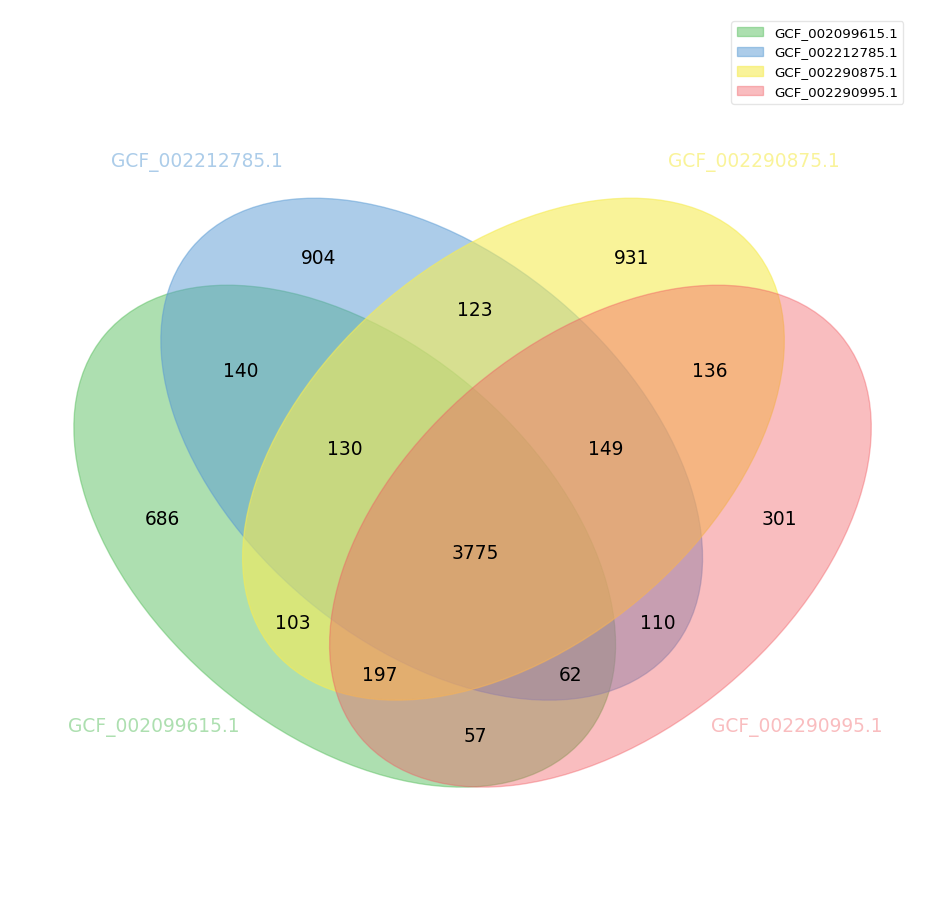

In [10]:
#labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17)], fill=['number', 'logic'])
labels = {'0110': b_c_acc, '0111': b_c_d_acc, '0001': d_unique, '0011': c_d_acc, '0010': c_unique, '0101': b_d_acc,
          '0100': b_unique, '1111': a_b_c_d_core, '1110': a_b_c_acc, '1100': a_b_acc, '1101': a_b_d_acc, '1010': a_c_acc, 
          '1011': a_c_d_acc, '1001': a_d_acc, '1000': a_unique}
fig, ax = venn.venn4(labels, names=[A, B, C, D])
plt.savefig( "%s_%s_%s_%s.svg" % (A, B, C, D), format="svg")
plt.savefig( "%s_%s_%s_%s.png" % (A, B, C, D), format="png")
fig.show()